In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\Jay\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_hdf('aa_one_hot_highlow.h5')

In [3]:
data.head()

,class,prest_id,conc_cf,aa_one_hot
1,0,140099,2.91540,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,0,140225,1.48770,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,0,140325,1.50290,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
8,0,140354,0.92003,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10,0,140500,2.21830,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [4]:
data.tail()

,class,prest_id,conc_cf,aa_one_hot
45201,1,4550047,12.28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45202,1,4550053,11.18,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
45203,1,4550054,10.94,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
45204,1,4560007,11.30,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
45205,1,4560013,9.38,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [5]:
data['aa_one_hot'][1].shape

(149, 20)

In [6]:
# create a 3D array of one one hot encodings
max_len = 149
width = 20
num_samples = data.shape[0]

X = np.zeros((num_samples, max_len, width))
for idx, aa_one_hot in enumerate(data['aa_one_hot'].values):
    X[idx, :, :] = aa_one_hot

    
y = data['class'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [8]:
def make_model(x_train, y_train, x_test, y_test, filt_width=3, epochs=1):

    # simple model per Yoon Kim (2014)
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten
    from keras.layers import Conv1D, GlobalMaxPooling1D, AveragePooling1D
    model = Sequential()
    model.add(Conv1D(10, filt_width, activation='relu', input_shape=(149, 20)))
    #model.add(AveragePooling1D(pool_size=2, strides=None, padding='valid'))
    #model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=50, epochs=epochs,
              validation_data=(x_test, y_test), verbose=2)
    model.save('model_'+ str(filt_width) + '.h5')
    print('model saved as: ', 'model_'+ str(filt_width) + '.h5')
    return

In [9]:
make_model(x_train, y_train, x_test, y_test, filt_width=3, epochs=1)

Using TensorFlow backend.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Train on 15822 samples, validate on 6781 samples
Epoch 1/1
 - 3s - loss: 0.6839 - acc: 0.5596 - val_loss: 0.6599 - val_acc: 0.6032
model saved as:  model_3.h5


In [23]:
import keras
model_3 = keras.models.load_model('model_3.h5')

In [24]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 147, 10)           610       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 10)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [10]:
make_model(x_train, y_train, x_test, y_test, filt_width=4, epochs=100)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 4s - loss: 0.7242 - acc: 0.5021 - val_loss: 0.6902 - val_acc: 0.5403
Epoch 2/100
 - 4s - loss: 0.6934 - acc: 0.5240 - val_loss: 0.6873 - val_acc: 0.5692
Epoch 3/100
 - 4s - loss: 0.6876 - acc: 0.5439 - val_loss: 0.6846 - val_acc: 0.5856
Epoch 4/100
 - 4s - loss: 0.6843 - acc: 0.5548 - val_loss: 0.6816 - val_acc: 0.5974
Epoch 5/100
 - 4s - loss: 0.6810 - acc: 0.5641 - val_loss: 0.6788 - val_acc: 0.6015
Epoch 6/100
 - 4s - loss: 0.6779 - acc: 0.5746 - val_loss: 0.6757 - val_acc: 0.6048
Epoch 7/100
 - 4s - loss: 0.6726 - acc: 0.5873 - val_loss: 0.6727 - val_acc: 0.6071
Epoch 8/100
 - 4s - loss: 0.6731 - acc: 0.5825 - val_loss: 0.6720 - val_acc: 0.6049
Epoch 9/100
 - 4s - loss: 0.6709 - acc: 0.5905 - val_loss: 0.6698 - val_acc: 0.6117
Epoch 10/100
 - 4s - loss: 0.6692 - acc: 0.5897 - val_loss: 0.6679 - val_acc: 0.6098
Epoch 11/100
 - 4s - loss: 0.6680 - acc: 0.5925 - val_loss: 0.6670 - val_acc: 0.6129
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 4s - loss: 0.6477 - acc: 0.6209 - val_loss: 0.6584 - val_acc: 0.6105
Epoch 98/100
 - 4s - loss: 0.6479 - acc: 0.6176 - val_loss: 0.6604 - val_acc: 0.6067
Epoch 99/100
 - 4s - loss: 0.6465 - acc: 0.6219 - val_loss: 0.6594 - val_acc: 0.6107
Epoch 100/100
 - 4s - loss: 0.6475 - acc: 0.6172 - val_loss: 0.6581 - val_acc: 0.6101
model saved as:  model_4.h5


In [11]:
make_model(x_train, y_train, x_test, y_test, filt_width=5, epochs=100)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 5s - loss: 0.7339 - acc: 0.5065 - val_loss: 0.6884 - val_acc: 0.5458
Epoch 2/100
 - 4s - loss: 0.6928 - acc: 0.5264 - val_loss: 0.6851 - val_acc: 0.5648
Epoch 3/100
 - 4s - loss: 0.6839 - acc: 0.5510 - val_loss: 0.6816 - val_acc: 0.5818
Epoch 4/100
 - 4s - loss: 0.6797 - acc: 0.5702 - val_loss: 0.6784 - val_acc: 0.5874
Epoch 5/100
 - 4s - loss: 0.6750 - acc: 0.5745 - val_loss: 0.6756 - val_acc: 0.5934
Epoch 6/100
 - 4s - loss: 0.6729 - acc: 0.5782 - val_loss: 0.6725 - val_acc: 0.5971
Epoch 7/100
 - 4s - loss: 0.6704 - acc: 0.5886 - val_loss: 0.6713 - val_acc: 0.6004
Epoch 8/100
 - 4s - loss: 0.6682 - acc: 0.5904 - val_loss: 0.6691 - val_acc: 0.6018
Epoch 9/100
 - 4s - loss: 0.6657 - acc: 0.5936 - val_loss: 0.6668 - val_acc: 0.6037
Epoch 10/100
 - 4s - loss: 0.6622 - acc: 0.6018 - val_loss: 0.6661 - val_acc: 0.6063
Epoch 11/100
 - 4s - loss: 0.6602 - acc: 0.6026 - val_loss: 0.6636 - val_acc: 0.6095
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 4s - loss: 0.6383 - acc: 0.6274 - val_loss: 0.6561 - val_acc: 0.6064
Epoch 98/100
 - 4s - loss: 0.6395 - acc: 0.6273 - val_loss: 0.6565 - val_acc: 0.6086
Epoch 99/100
 - 4s - loss: 0.6400 - acc: 0.6235 - val_loss: 0.6569 - val_acc: 0.6111
Epoch 100/100
 - 4s - loss: 0.6368 - acc: 0.6291 - val_loss: 0.6571 - val_acc: 0.6065
model saved as:  model_5.h5


In [12]:
make_model(x_train, y_train, x_test, y_test, filt_width=6, epochs=100)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 5s - loss: 0.7241 - acc: 0.5188 - val_loss: 0.6853 - val_acc: 0.5561
Epoch 2/100
 - 4s - loss: 0.6897 - acc: 0.5422 - val_loss: 0.6803 - val_acc: 0.5883
Epoch 3/100
 - 4s - loss: 0.6810 - acc: 0.5595 - val_loss: 0.6767 - val_acc: 0.6027
Epoch 4/100
 - 4s - loss: 0.6754 - acc: 0.5810 - val_loss: 0.6735 - val_acc: 0.5981
Epoch 5/100
 - 4s - loss: 0.6707 - acc: 0.5880 - val_loss: 0.6693 - val_acc: 0.6065
Epoch 6/100
 - 4s - loss: 0.6676 - acc: 0.5973 - val_loss: 0.6673 - val_acc: 0.6082
Epoch 7/100
 - 4s - loss: 0.6670 - acc: 0.5901 - val_loss: 0.6667 - val_acc: 0.6105
Epoch 8/100
 - 4s - loss: 0.6639 - acc: 0.5983 - val_loss: 0.6640 - val_acc: 0.6102
Epoch 9/100
 - 4s - loss: 0.6617 - acc: 0.6055 - val_loss: 0.6632 - val_acc: 0.6129
Epoch 10/100
 - 4s - loss: 0.6574 - acc: 0.6128 - val_loss: 0.6620 - val_acc: 0.6154
Epoch 11/100
 - 4s - loss: 0.6560 - acc: 0.6159 - val_loss: 0.6606 - val_acc: 0.6129
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 4s - loss: 0.6279 - acc: 0.6437 - val_loss: 0.6575 - val_acc: 0.6157
Epoch 98/100
 - 4s - loss: 0.6258 - acc: 0.6481 - val_loss: 0.6571 - val_acc: 0.6157
Epoch 99/100
 - 4s - loss: 0.6252 - acc: 0.6470 - val_loss: 0.6589 - val_acc: 0.6124
Epoch 100/100
 - 4s - loss: 0.6297 - acc: 0.6437 - val_loss: 0.6581 - val_acc: 0.6145
model saved as:  model_6.h5


In [13]:
make_model(x_train, y_train, x_test, y_test, filt_width=8, epochs=100)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 5s - loss: 0.7129 - acc: 0.5102 - val_loss: 0.6851 - val_acc: 0.5740
Epoch 2/100
 - 5s - loss: 0.6849 - acc: 0.5497 - val_loss: 0.6804 - val_acc: 0.5911
Epoch 3/100
 - 5s - loss: 0.6766 - acc: 0.5781 - val_loss: 0.6738 - val_acc: 0.6105
Epoch 4/100
 - 5s - loss: 0.6728 - acc: 0.5847 - val_loss: 0.6691 - val_acc: 0.6132
Epoch 5/100
 - 5s - loss: 0.6668 - acc: 0.5976 - val_loss: 0.6640 - val_acc: 0.6178
Epoch 6/100
 - 5s - loss: 0.6614 - acc: 0.6068 - val_loss: 0.6619 - val_acc: 0.6223
Epoch 7/100
 - 5s - loss: 0.6568 - acc: 0.6195 - val_loss: 0.6583 - val_acc: 0.6253
Epoch 8/100
 - 5s - loss: 0.6543 - acc: 0.6188 - val_loss: 0.6575 - val_acc: 0.6229
Epoch 9/100
 - 5s - loss: 0.6515 - acc: 0.6236 - val_loss: 0.6553 - val_acc: 0.6226
Epoch 10/100
 - 5s - loss: 0.6477 - acc: 0.6271 - val_loss: 0.6542 - val_acc: 0.6256
Epoch 11/100
 - 5s - loss: 0.6491 - acc: 0.6250 - val_loss: 0.6537 - val_acc: 0.6238
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 5s - loss: 0.6086 - acc: 0.6613 - val_loss: 0.6457 - val_acc: 0.6181
Epoch 98/100
 - 5s - loss: 0.6096 - acc: 0.6553 - val_loss: 0.6465 - val_acc: 0.6206
Epoch 99/100
 - 5s - loss: 0.6093 - acc: 0.6599 - val_loss: 0.6480 - val_acc: 0.6219
Epoch 100/100
 - 5s - loss: 0.6137 - acc: 0.6603 - val_loss: 0.6475 - val_acc: 0.6203
model saved as:  model_8.h5


In [14]:
make_model(x_train, y_train, x_test, y_test, filt_width=10, epochs=100)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 6s - loss: 0.7184 - acc: 0.5109 - val_loss: 0.6850 - val_acc: 0.5685
Epoch 2/100
 - 6s - loss: 0.6834 - acc: 0.5551 - val_loss: 0.6792 - val_acc: 0.5921
Epoch 3/100
 - 6s - loss: 0.6768 - acc: 0.5763 - val_loss: 0.6742 - val_acc: 0.6008
Epoch 4/100
 - 6s - loss: 0.6682 - acc: 0.5951 - val_loss: 0.6687 - val_acc: 0.6063
Epoch 5/100
 - 6s - loss: 0.6642 - acc: 0.6026 - val_loss: 0.6641 - val_acc: 0.6150
Epoch 6/100
 - 6s - loss: 0.6568 - acc: 0.6110 - val_loss: 0.6605 - val_acc: 0.6144
Epoch 7/100
 - 6s - loss: 0.6511 - acc: 0.6199 - val_loss: 0.6575 - val_acc: 0.6169
Epoch 8/100
 - 6s - loss: 0.6491 - acc: 0.6204 - val_loss: 0.6558 - val_acc: 0.6172
Epoch 9/100
 - 6s - loss: 0.6442 - acc: 0.6279 - val_loss: 0.6542 - val_acc: 0.6210
Epoch 10/100
 - 6s - loss: 0.6429 - acc: 0.6337 - val_loss: 0.6533 - val_acc: 0.6247
Epoch 11/100
 - 6s - loss: 0.6404 - acc: 0.6310 - val_loss: 0.6533 - val_acc: 0.6189
Epoch 12/100
 - 6s - loss

Epoch 97/100
 - 6s - loss: 0.5931 - acc: 0.6668 - val_loss: 0.6503 - val_acc: 0.6316
Epoch 98/100
 - 6s - loss: 0.5929 - acc: 0.6639 - val_loss: 0.6513 - val_acc: 0.6250
Epoch 99/100
 - 6s - loss: 0.5932 - acc: 0.6676 - val_loss: 0.6508 - val_acc: 0.6272
Epoch 100/100
 - 6s - loss: 0.5896 - acc: 0.6715 - val_loss: 0.6498 - val_acc: 0.6293
model saved as:  model_10.h5


In [15]:
make_model(x_train, y_train, x_test, y_test, filt_width=12, epochs=100)

Train on 15822 samples, validate on 6781 samples
Epoch 1/100
 - 6s - loss: 0.7028 - acc: 0.5217 - val_loss: 0.6850 - val_acc: 0.5807
Epoch 2/100
 - 6s - loss: 0.6848 - acc: 0.5519 - val_loss: 0.6784 - val_acc: 0.6185
Epoch 3/100
 - 6s - loss: 0.6743 - acc: 0.5870 - val_loss: 0.6704 - val_acc: 0.6231
Epoch 4/100
 - 6s - loss: 0.6645 - acc: 0.6049 - val_loss: 0.6627 - val_acc: 0.6297
Epoch 5/100
 - 6s - loss: 0.6554 - acc: 0.6165 - val_loss: 0.6570 - val_acc: 0.6247
Epoch 6/100
 - 6s - loss: 0.6486 - acc: 0.6274 - val_loss: 0.6529 - val_acc: 0.6228
Epoch 7/100
 - 6s - loss: 0.6416 - acc: 0.6341 - val_loss: 0.6514 - val_acc: 0.6272
Epoch 8/100
 - 6s - loss: 0.6395 - acc: 0.6317 - val_loss: 0.6496 - val_acc: 0.6251
Epoch 9/100
 - 6s - loss: 0.6364 - acc: 0.6405 - val_loss: 0.6470 - val_acc: 0.6272
Epoch 10/100
 - 6s - loss: 0.6290 - acc: 0.6466 - val_loss: 0.6476 - val_acc: 0.6228
Epoch 11/100
 - 6s - loss: 0.6259 - acc: 0.6528 - val_loss: 0.6461 - val_acc: 0.6287
Epoch 12/100
 - 6s - loss

Epoch 97/100
 - 6s - loss: 0.5702 - acc: 0.6940 - val_loss: 0.6436 - val_acc: 0.6301
Epoch 98/100
 - 6s - loss: 0.5682 - acc: 0.7010 - val_loss: 0.6443 - val_acc: 0.6301
Epoch 99/100
 - 6s - loss: 0.5710 - acc: 0.6953 - val_loss: 0.6438 - val_acc: 0.6298
Epoch 100/100
 - 6s - loss: 0.5683 - acc: 0.6985 - val_loss: 0.6464 - val_acc: 0.6247
model saved as:  model_12.h5


## Make an ensemble with these models

In [9]:
#load all the models
import keras
model_3 = keras.models.load_model('model_3.h5')
model_4 = keras.models.load_model('model_4.h5')
model_5 = keras.models.load_model('model_5.h5')
model_6 = keras.models.load_model('model_6.h5')
model_8 = keras.models.load_model('model_8.h5')
model_10 = keras.models.load_model('model_10.h5')
model_12 = keras.models.load_model('model_12.h5')


In [10]:
x = x_train
y = y_train

y_pred3 = model_3.predict(x)
y_pred4 = model_4.predict(x)
y_pred5 = model_5.predict(x)
y_pred6 = model_6.predict(x)
y_pred8 = model_8.predict(x)
y_pred10 = model_10.predict(x)
y_pred12 = model_12.predict(x)

y_pred_total = np.round((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.7814435596005562

In [11]:
x = x_train
y = y_train

y_pred3 = model_3.predict(x)
y_pred4 = model_4.predict(x)
y_pred5 = model_5.predict(x)
y_pred6 = model_6.predict(x)
y_pred8 = model_8.predict(x)
y_pred10 = model_10.predict(x)
y_pred12 = model_12.predict(x)

#round each prediction and then average
y_pred_total = np.round((np.round(y_pred3) + 
                         np.round(y_pred4) + 
                         np.round(y_pred5) + 
                         np.round(y_pred6) + 
                         np.round(y_pred8) + 
                         np.round(y_pred10) +
                         np.round(y_pred12))/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Train acc')
np.sum(z)/len(z)

Train acc


0.7609657439008974

In [18]:
x = x_test
y = y_test

y_pred3 = model_3.predict(x)
y_pred4 = model_4.predict(x)
y_pred5 = model_5.predict(x)
y_pred6 = model_6.predict(x)
y_pred8 = model_8.predict(x)
y_pred10 = model_10.predict(x)
y_pred12 = model_12.predict(x)

y_pred_total = np.round((y_pred3 + y_pred4 + y_pred5 + y_pred6 + y_pred8 + y_pred10 + y_pred12)/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)

Test acc


0.6546232119156467

In [14]:
x = x_test
y = y_test

y_pred3 = model_3.predict(x)
y_pred4 = model_4.predict(x)
y_pred5 = model_5.predict(x)
y_pred6 = model_6.predict(x)
y_pred8 = model_8.predict(x)
y_pred10 = model_10.predict(x)
y_pred12 = model_12.predict(x)

#round each prediction and then average
y_pred_total = np.round((np.round(y_pred3) + 
                         np.round(y_pred4) + 
                         np.round(y_pred5) + 
                         np.round(y_pred6) + 
                         np.round(y_pred8) + 
                         np.round(y_pred10) +
                         np.round(y_pred12))/7)

z = y_pred_total == np.reshape(y, [-1,1])

print('Test acc')
np.sum(z)/len(z)

Test acc


0.6462173720690164

# Filter Vizualization

In [19]:
#try to vizulaize the filters
weights = model_8.get_weights()

In [20]:
weights[0].shape

(8, 20, 10)

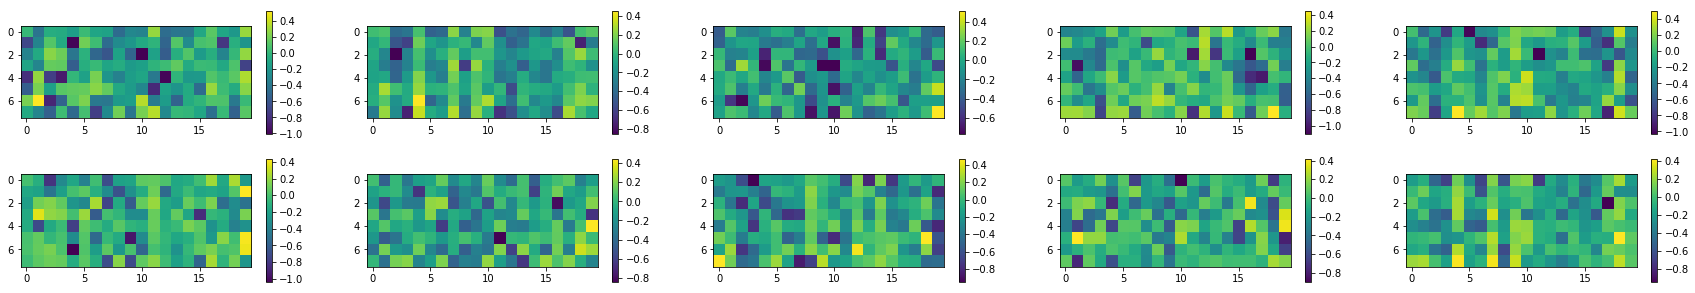

In [21]:
#I'm expecting 10 filters that are 8 x 20
#if I'm interpreting this correctly the weights[0] is and array [8x20 filter, 10 filters]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,5))
for ind in range(1,11):
    w = weights[0][:,:,ind-1]
    plt.subplot(2,5,ind)
    plt.imshow(w)
    plt.colorbar()

since the data only has a single hot pixel in each row, I would expect to see similar patterns in the filters, but this doesn't look much like that so maybe there is some more work to be done here or my expecation is wrong.